In [1]:
from __future__ import division
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import wcs

import numpy as np
from matplotlib.colors import SymLogNorm, LogNorm
from astropy.coordinates import SkyCoord
from scipy import ndimage
#from HAWCplot import HAWC_footprint
#from IPython.display import display, Math, Latex #For Latex math symbols

import numpy as np

from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file

file1 = './current_fits/F0450_HA_POL_unk5_HAWDHWPD_PMP_043-118.fits'

%matplotlib notebook

 Read in polarization information. The HDU list for polarimetry is as follows:
# 
 0: Stokes I  
 1: I error  
 2: Q  
 3: Q error  
 4: U  
 5: U error  
 6: Image Mask  
 7: Percent Pol  
 8: Percent Pol (debiased)  
 9: Pol error  
 10: Pol angle  
 11: Pol Angle (B-field)  
 12: Angle error  
 13: Merged data  

In [2]:
polfile=fits.open(file1)
w2=wcs.WCS(polfile[0].header)
xpix=polfile[0].header['NAXIS1']
ypix=polfile[0].header['NAXIS2']
data1 = polfile[0].data
polvec = polfile[11].data

(300,) (300,)
(300,) (300,)


<IPython.core.display.Javascript object>


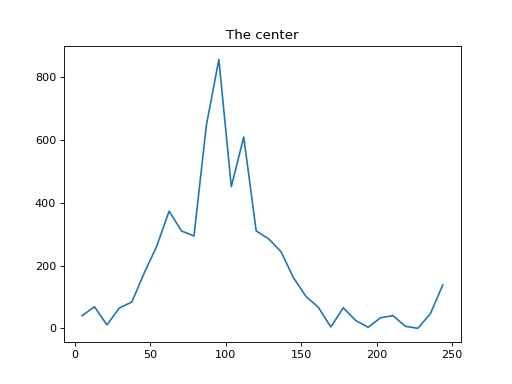

In [3]:
x = data1[85:105, 75:90]
x.shape

deriv_0 = ndimage.gaussian_filter1d(x ,3,axis=0,order=1)
deriv_1 = ndimage.gaussian_filter1d(x,3,axis=1,order=1)
grad = np.sqrt(deriv_0**2 + deriv_1**2)
angle = np.arctan2(deriv_0,deriv_1)*(180./np.pi)
#angle = angle*(180./np.pi)
polvec1 = polvec[85:105, 75:90]
dphi = abs(angle -  polvec1)
dphi = dphi.flatten()
grad = grad.flatten()
print(dphi.shape, grad.shape)
m = np.where(np.isnan(dphi) == False)
dphi = dphi[m]
grad = grad[m]
#dphi = dphi[np.isnan(dphi) == False]
#grad = grad[np.isnan(grad) == False]
print(dphi.shape, grad.shape)

plt.figure()
hist, bins = np.histogram(dphi ,bins=30, weights = grad)
center = (bins[:-1] + bins[1:]) / 2
    #hist1 = np.histogram(grad,bins=20)
    #print hist, hist1
plt.plot(center,hist)
plt.show()
plt.title("The center")
plt.savefig("Center1.pdf")

(900,) (900,)
(892,) (892,)


<IPython.core.display.Javascript object>


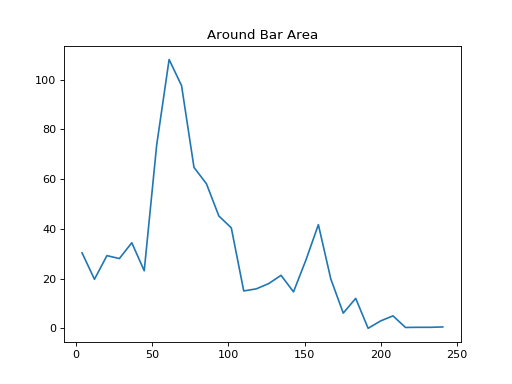

In [4]:
x = data1[40:70, 30:60]
x.shape

deriv_0 = ndimage.gaussian_filter1d(x,3,axis=0,order=1)
deriv_1 = ndimage.gaussian_filter1d(x,3,axis=1,order=1)
grad = np.sqrt(deriv_0**2 + deriv_1**2)
angle = np.arctan2(deriv_0,deriv_1)*(180./np.pi)
#angle = angle*(180./np.pi)
polvec1 = polvec[40:70, 30:60]
dphi = abs(angle -  polvec1)
dphi = dphi.flatten()
grad = grad.flatten()
print(dphi.shape, grad.shape)
m = np.where(np.isnan(dphi) == False)
dphi = dphi[m]
grad = grad[m]
#dphi = dphi[np.isnan(dphi) == False]
#grad = grad[np.isnan(grad) == False]
print(dphi.shape, grad.shape)

plt.figure()
hist, bins = np.histogram(dphi ,bins=30, weights = grad)
center = (bins[:-1] + bins[1:]) / 2
    #hist1 = np.histogram(grad,bins=20)
    #print hist, hist1
plt.plot(center,hist)
plt.title("Around Bar Area")
plt.show()
plt.savefig("Bar_Area1.pdf")

(750,) (750,)
(749,) (749,)


<IPython.core.display.Javascript object>


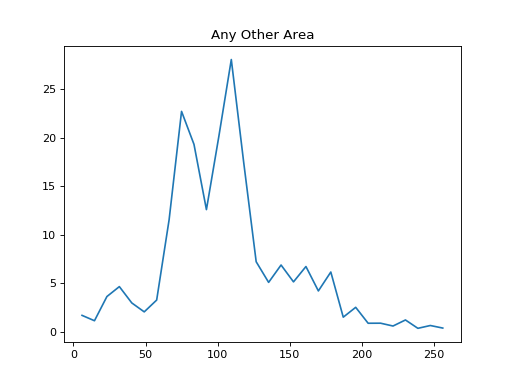

In [5]:
x = data1[65:95, 40:65]
x.shape

deriv_0 = ndimage.gaussian_filter1d(x,3,axis=0,order=1)
deriv_1 = ndimage.gaussian_filter1d(x,3,axis=1,order=1)
grad = np.sqrt(deriv_0**2 + deriv_1**2)
angle = np.arctan2(deriv_0,deriv_1)*(180./np.pi)
#angle = angle*(180./np.pi)
polvec1 = polvec[65:95, 40:65]
dphi = abs(angle -  polvec1)
dphi = dphi.flatten()
grad = grad.flatten()
print(dphi.shape, grad.shape)
m = np.where(np.isnan(dphi) == False)
dphi = dphi[m]
grad = grad[m]
#dphi = dphi[np.isnan(dphi) == False]
#grad = grad[np.isnan(grad) == False]
print(dphi.shape, grad.shape)

plt.figure()
hist, bins = np.histogram(dphi ,bins=30, weights = grad)
center = (bins[:-1] + bins[1:]) / 2
    #hist1 = np.histogram(grad,bins=20)
    #print hist, hist1
plt.plot(center,hist)
plt.title("Any Other Area")
plt.show()
plt.savefig("Other1.pdf")

In [148]:
from matplotlib.path import Path

nx, ny = 142, 158
poly_verts = [(71.72, 118.534), (74.011, 109.086), (73.73, 99.93), (75.44, 91.62),
             (79.74, 84.18), (80.31, 74.16), (82.03, 65.00), (89.47, 65), 
             (89.18, 76.16), (90.62, 87.90), (88.61, 102.22), (83.74, 110.52),
             (79.45, 120.82), (76.87, 126.55), (71.72, 118.534)]

# Create vertex coordinates for each grid cell...
# (<0,0> is at the top left of the grid in this system)
x, y = np.meshgrid(np.arange(nx), np.arange(ny))
x, y = x.flatten(), y.flatten()

points = np.vstack((x,y)).T

path = Path(poly_verts)
grid = path.contains_points(points)
grid = grid.reshape((ny,nx))

print (grid)
grid.shape

[[False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]
 ..., 
 [False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]]


(158, 142)

In [149]:
sample_data = data1*grid
sample_polang = polfile[11].data*grid 

(22436,) (22436,)
(7018,) (7018,)


<IPython.core.display.Javascript object>


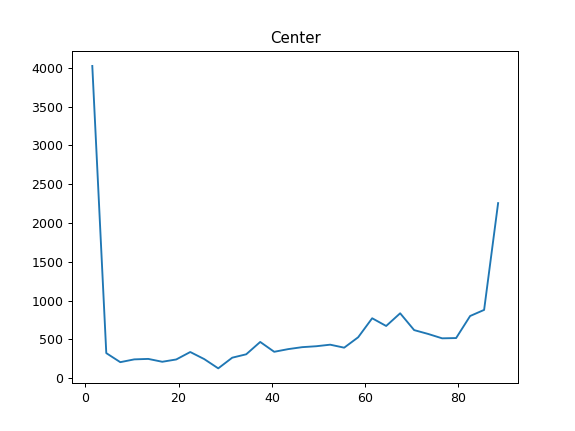

In [151]:
deriv_0 = ndimage.gaussian_filter1d(sample_data,3,axis=0,order=1)
deriv_1 = ndimage.gaussian_filter1d(sample_data,3,axis=1,order=1)
grad = np.sqrt(deriv_0**2 + deriv_1**2)
angle = np.arctan2(deriv_0,deriv_1)*(180./np.pi)
#angle = angle*(180./np.pi)
#polvec1 = polvec[40:70, 30:60]
dphi = abs(angle -  sample_polang)
dphi = dphi.flatten()
grad = grad.flatten()
print(dphi.shape, grad.shape)
m = np.where(np.isnan(dphi) == False)
dphi = dphi[m]
grad = grad[m]
for i in range(len(dphi)):
    if dphi[i] > 90:
        dphi[i] = abs(dphi[i] - 180)   
#dphi = dphi[np.isnan(dphi) == False]
#grad = grad[np.isnan(grad) == False]
print(dphi.shape, grad.shape)

plt.figure()
hist, bins = np.histogram(dphi , bins=30, weights = grad)
center = (bins[:-1] + bins[1:]) / 2
    #hist1 = np.histogram(grad,bins=20)
    #print hist, hist1
plt.plot(center,hist)
plt.title("Center")
plt.show()
plt.savefig("center_mask.pdf")

In [9]:
data1 = polfile[0].data
data3 = data1.copy()
m1 = np.where((data3 > 55) & (data3 < 20)) 
sample_polang1 = polfile[11].data 

C:\Users\User\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()
C:\Users\User\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()


<IPython.core.display.Javascript object>


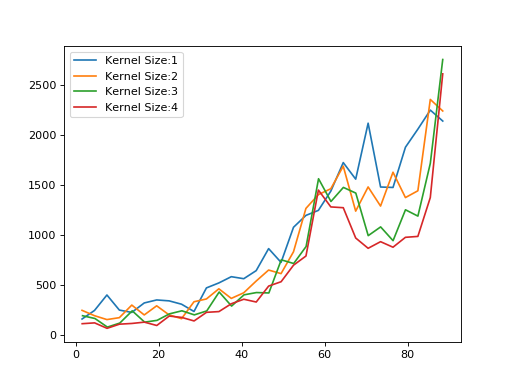

(22436,) (22436,)
(9124,) (9124,)
(22436,) (22436,)
(8051,) (8051,)
(22436,) (22436,)
(7018,) (7018,)
(22436,) (22436,)
(5981,) (5981,)


In [10]:
plt.figure()
for i in np.arange(1, 5, 1):
    deriv_0 = ndimage.gaussian_filter1d(data3,i,axis=0,order=1)
    deriv_1 = ndimage.gaussian_filter1d(data3,i,axis=1,order=1)
    grad = np.sqrt(deriv_0**2 + deriv_1**2)
    angle = np.arctan2(deriv_0,deriv_1)*(180./np.pi)
    angle[m1] = np.nan
    grad[m1] = np.nan
    dphi = abs(angle -  sample_polang1)
    dphi = dphi.flatten()
    grad = grad.flatten()
    print(dphi.shape, grad.shape)

    m2 = np.where(np.isnan(dphi) == False)
    dphi = dphi[m2]
    grad = grad[m2]
    for j in range(len(dphi)):
        if dphi[j] > 90:
            dphi[j] = abs(dphi[j] - 180)   
    print(dphi.shape, grad.shape)
    hist, bins = np.histogram(dphi, bins = 30, weights = grad)
    center = (bins[:-1] + bins[1:]) / 2
    plt.plot(center,hist, label = "Kernel Size:" + str(i))
    plt.legend()
    #plt.title("Center")
    plt.show()
#plt.savefig("center_mask.pdf")

<IPython.core.display.Javascript object>


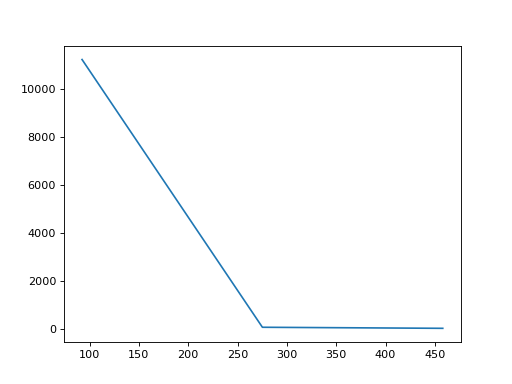

(158, 142)
(22436,)
(11304,)
20.2863143208
35.6602614188


In [133]:
plt.figure()
data5 = data1.copy()
sample_data = data5.flatten()
print(data1.shape)
print(sample_data.shape)
m = np.where(np.isnan(sample_data) == False)
sample_data = sample_data[m]
print(sample_data.shape)
#sample_data = sample_data
hist, bins = np.histogram(sample_data, bins = 3)

center = (bins[:-1] + bins[1:])/2
plt.plot(center, hist)
plt.show()
print(np.mean(sample_data))
print(np.std(sample_data))

In [18]:
hist

array([11212,    68,    24], dtype=int64)

In [19]:
bins

array([   0.76824074,  183.68758348,  366.60692621,  549.52626895])

In [20]:
bins[0]

0.76824074314864821

<IPython.core.display.Javascript object>


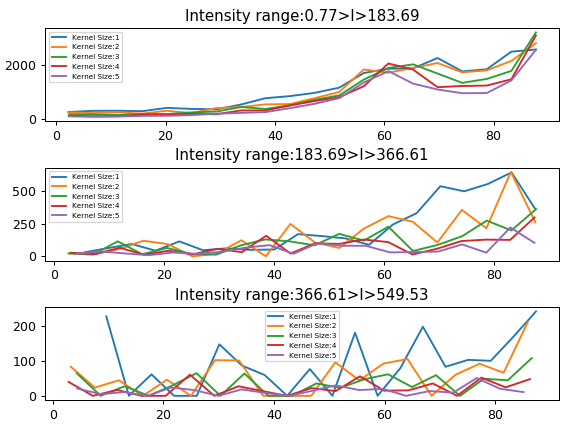

C:\Users\User\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: invalid value encountered in greater_equal
C:\Users\User\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: invalid value encountered in less_equal


In [146]:
data1 = polfile[0].data
data3 = data1.copy()

data5 = data1.copy()
sample_data = data5.flatten()
m = np.where(np.isnan(sample_data) == False)
sample_data = sample_data[m]
hist, bins = np.histogram(sample_data, bins = 3)  # for changing the number of bins
plt.figure()
for i in range(len(bins)-1):
#    plt.figure()
    m1 = (data3 >= bins[i]) & (data3 <= bins[i+1])
 #   print(m1.shape)

    try:
        plt.subplot(len(hist), 1, i+1)
    except:
        break
    for j in np.arange(1, 6, 1):  # for changing the kernel
        polang1 = polfile[11].data
        deriv_0 = ndimage.gaussian_filter1d(data3,j,axis=0,order=1)
        deriv_1 = ndimage.gaussian_filter1d(data3,j,axis=1,order=1)
        grad = np.sqrt(deriv_0**2 + deriv_1**2)
        angle = np.arctan2(deriv_0,deriv_1)*(180./np.pi)
        angle = angle[m1]
        grad = grad[m1]
        #polang1 = polang1[m1]
        polang1 = polang1[m1]
        dphi = abs(angle -  polang1)
        #dphi = dphi.flatten()
        #grad = grad.flatten()
        # print(dphi.shape, grad.shape)

        m2 = np.where(np.isnan(dphi) == False)
        dphi = dphi[m2]
        grad = grad[m2]
        for k in range(len(dphi)):
            if dphi[k] > 90:
                dphi[k] = abs(dphi[k] - 180)   
 #       print(dphi.shape, grad.shape)
        hist1, bins1 = np.histogram(dphi, bins = 20, weights = grad)
        center = (bins1[:-1] + bins1[1:]) / 2
        plt.plot(center,hist1, label = "Kernel Size:" + str(j))
        plt.legend(fontsize = "xx-small")
        plt.show()
        #plt.title("Center")
    plt.title("Intensity range:" +
              str('{0:.2f}'.format(bins[i])) +
              ">" + "I" + ">" + str('{0:.2f}'.format(bins[i+1])))
    plt.show()
    plt.tight_layout()
    plt.savefig("Intensity_bins.pdf")
#'{0:.2f}'.format(pi)

549.52626894947923

In [130]:
hist

array([11212,    68,    24], dtype=int64)

In [131]:
bins

array([   0.76824074,  183.68758348,  366.60692621,  549.52626895])

In [49]:
hist, bins = np.histogram(sample_data, bins = 3)

In [54]:
bins

array([   0.76824074,  183.68758348,  366.60692621,  549.52626895])

In [55]:
hist

array([11212,    68,    24], dtype=int64)

In [84]:
m1 = np.where((data3 > 183.6) & (data3 < 25))

C:\Users\User\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':
C:\Users\User\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


In [85]:
print(m1)

(array([], dtype=int64), array([], dtype=int64))


In [67]:
bins[1]

183.68758347859216

In [89]:
np.where((data3 < 250) & (data3 >25))

C:\Users\User\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':
C:\Users\User\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


(array([ 29,  29,  30, ..., 149, 150, 150], dtype=int64),
 array([73, 74, 74, ..., 77, 75, 76], dtype=int64))

In [92]:
np.where((data3 > 25) & (data3< 0.7))

C:\Users\User\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':
C:\Users\User\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


(array([], dtype=int64), array([], dtype=int64))

In [99]:
m1 = (data3 > 25) | (data3 < 0.7)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':
C:\Users\User\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


In [100]:
m1

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

In [101]:
data3[m1]

array([ 25.97135992,  25.3885321 ,  25.66752668, ...,  25.67916719,
        27.29855462,  25.72322501])

In [106]:
m1 = (data3 >= bins[0]) & (data3 <= bins[1])

C:\Users\User\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in greater_equal
  if __name__ == '__main__':
C:\Users\User\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in less_equal
  if __name__ == '__main__':


In [107]:
m1

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

In [108]:
grad[m1]

IndexError: too many indices for array

In [109]:
m1.shape

(158, 142)

In [110]:
grad.shape

(11212,)

In [118]:
sample_polang1 = polfile[11].data

In [119]:
sample_polang1.shape

(158, 142)

In [120]:
sample_polang1[m1]

array([-53.74659667, -59.39514364, -69.32491963, -48.79789937,
       -53.10483869, -63.74754341, -74.43079725, -55.78235716,
       -55.47515282, -68.9326757 , -77.74685325, -78.0942981 ,
       -64.92272959, -61.69123348, -70.8215507 , -74.74225518,
       -69.12810138, -65.20775496, -66.88979886, -68.54885789,
       -77.75425826, -72.1946945 , -61.32306897, -67.8677564 ])

In [124]:
polang1

array([         nan,          nan,          nan, ...,          nan,
       -44.52513187, -44.52513187])